## Bank or Break?

**Using the information and behavior of Beta Bank's current and past customers, our goal is to potentially predict if a client will stay or terminate their contract. Being that it is cheaper to keep existing customers, these predictions should help the bank save money.**

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample, shuffle

In [2]:
#import dataset
data = pd.read_csv('/datasets/Churn.csv')

**In the steps below, the data will be analyzed and cleaned.**

In [3]:
#view data info to check data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
#print 10 random rows to view details of each column
data.sample(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4151,4152,15569098,Winifred,627,France,Male,44,NaN,153548.12,1,0,0,35300.08,1
357,358,15661629,Ricci,522,Spain,Male,34,NaN,126436.29,1,1,0,174248.52,1
7140,7141,15716082,Chukwubuikem,703,Spain,Male,39,6.0,152685.40,1,0,0,183656.12,0
8455,8456,15692207,Ingle,609,France,Female,53,NaN,0.00,2,1,1,124218.27,0
8019,8020,15771154,North,683,France,Female,73,8.0,137732.23,2,1,1,133210.44,0
8083,8084,15684011,Miller,576,Germany,Male,29,NaN,130575.26,1,0,1,173629.78,0
4948,4949,15716357,Corran,772,Spain,Female,39,4.0,122486.11,2,1,1,140709.25,0
9713,9714,15623566,Barnhill,714,France,Male,40,9.0,46520.69,1,1,1,96687.25,0
2509,2510,15689341,Gibbs,655,France,Female,50,10.0,0.00,4,1,0,179267.94,1
7606,7607,15571571,Ting,680,Germany,Female,31,3.0,127331.46,3,1,1,176433.60,0


In [5]:
#print rows with null values 
null_rows = data[data['Tenure'].isnull()]
null_rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [6]:
#Replace null values of tenure column with zero. We will assume null values means the customer has not reached a year yet
data['Tenure'].fillna(0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**The steps below will split the dataset into a training, validation, and test set. It will also split each set into features and targets.**

In [7]:
#drop irrelevent columns
data_features = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
#use one hot encoding to make object columns into numerical
data_ohe = pd.get_dummies(data_features, drop_first=True)

In [9]:
#use train test split function twice to divide dataset into training, validation, and test set
df_train, df_test = train_test_split(data_ohe, test_size=0.2, random_state=12345)

df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=12345)

In [10]:
#create features and target variables for training set
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

#create features and target variables for validation set
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']

#create features and target variables for test set
features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

**This stage includes training machine learning models that include LogisticRegression, RandomForestClassifier, and DecisionTreeClassifier.**

In [11]:
#hyperparameter tuning for logistic regression
param_grid_lr = {"C": [0.01, 0.1, 1, 10], "class_weight": [None, "balanced"]}
log_reg = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, scoring="f1", cv=3, n_jobs=-1)
log_reg.fit(features_train, target_train)
best_lr = log_reg.best_estimator_

In [12]:
#calculate f1 score on validation set
predicted_best_lr = best_lr.predict(features_valid)
f1_score(target_valid, predicted_best_lr)

0.43212851405622493

In [13]:
#create loop to find best number of estimators for random forest classifier model
best_score = 0
best_est = 0
for est in range(1, 15): #choose hyperparameter range
    model = RandomForestClassifier(random_state=54321, n_estimators=est) #set number of trees
    model.fit(features_train, target_train) #train model on training set
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions) #calculate accuracy score on validation set
    if result > best_score:
        best_score = result #save best score on validation set
        best_est = est #save number of estimators corresponding to best score

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

Accuracy of the best model on the validation set (n_estimators = 13): 0.5679389312977099


In [14]:
#use random forest classifier model to find accuracy score on validation set
model = RandomForestClassifier(random_state=12345, n_estimators=13, class_weight='balanced') #use 1 number of estimators which was the best
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) #write code for validation set calculations here

print('F1 on validation set:', f1_score(target_valid, predicted_valid)) #finish up code here

F1 on validation set: 0.5624012638230647


In [15]:
#create loop to find best depth for decision tree
best_model = None
best_result = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=54321, max_depth=depth) #create a model with the given depth
    model.fit(features_train, target_train) #train the model
    predictions = model.predict(features_valid) #get the model's predictions
    result = f1_score(target_valid, predictions) #calculate the accuracy
    if result > best_result:
        best_model = model
        best_result = result
        
print("F1 score of the best model:", best_result)
print(best_model)

F1 score of the best model: 0.5497630331753556
DecisionTreeClassifier(max_depth=7, random_state=54321)


**After training each model, the one with the highest F1 score was RandomForestClassifier, so now it is time to fine tune. The steps below will view the imbalance of the dataset and a method to balance it.**

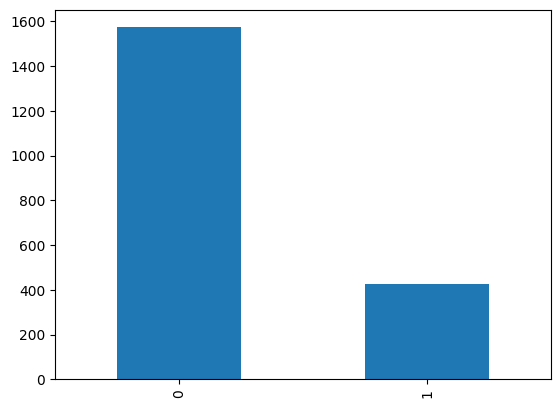

In [16]:
#create a bar graph showing imbalance of dataset
target_test.value_counts().plot(kind='bar')
plt.show()

**The graph demonstrates the imbalance of clients who have left the bank versus still with the bank. If we keep it as is, the machine could simply predict zero and get a high percentage of real positive answers. However, this does not help the task of determining who may actually decide to leave.**

In [17]:
#use standard scaler on numerical columns to balance each set
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [18]:
#upsample to balance the dataset
def upsample(features_train, target_train, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    
    arg1 = pd.concat([features_zeros] + [features_ones] * repeat)
    arg2 = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(arg1, arg2, random_state=12345)
    
    return features_upsampled, target_upsampled, arg1, arg2

features_upsampled, target_upsampled, arg1, arg2 = upsample(features_train, target_train, 4)

**Now that the dataset has been balanced, we can tune the hyperparameters of RandomForestClassifier to increase the F1 score.**

In [22]:
#hyperparameter tuning for random forest
param_grid_rf = {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None], "class_weight": [None, "balanced"]}
rf_model = GridSearchCV(RandomForestClassifier(random_state=12345), param_grid_rf, scoring="f1", cv=3, n_jobs=-1)
rf_model.fit(features_train, target_train)
best_rf = rf_model.best_estimator_

In [24]:
#calculate f1 score on test set
predicted_best_rf = best_rf.predict(features_test)
print('F1 score on test set:', f1_score(target_test, predicted_best_rf))

F1 score on test set: 0.631079478054567


In [25]:
#calculate auc roc score on test set
probabilities_test = best_rf.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC score on test set:', auc_roc)

AUC-ROC score on test set: 0.8671745542088314


**After balancing the dataset, the final F1 score was 0.63 and the AUC-ROC score was 0.86. Both of these metrics show that the trained RandomForest model should minimize false positives/negatives.**